(9,)


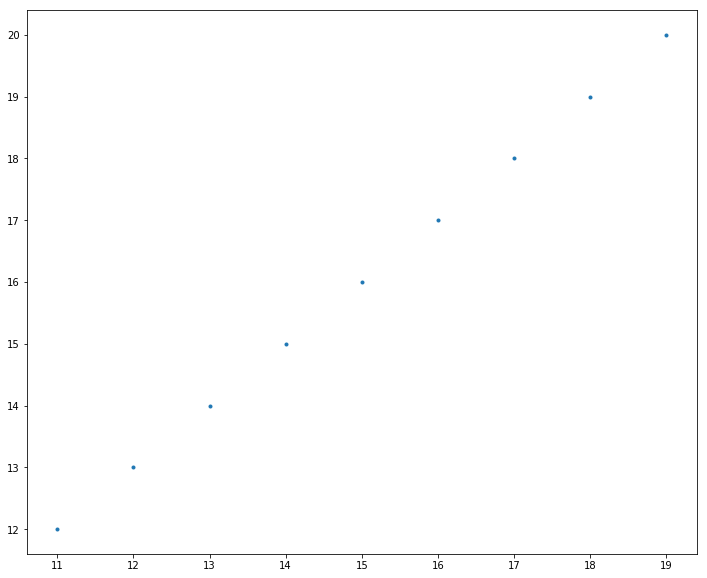

In [17]:
#Importing libraries. The same will be used throughout the article.
import tensorflow as tf
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab  import rcParams
rcParams['figure.figsize'] = 12, 10
x = np.array([i for i in range(11,20,1)])
print(x.shape)
np.random.seed(10)  #Setting seed for reproducability
y = x+1
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')

In [7]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
print (data.head())

          x         y       x_2       x_3       x_4       x_5       x_6  \
0  0.191986  1.191986  0.036859  0.007076  0.001359  0.000261  0.000050   
1  0.209440  1.209440  0.043865  0.009187  0.001924  0.000403  0.000084   
2  0.226893  1.226893  0.051480  0.011681  0.002650  0.000601  0.000136   
3  0.244346  1.244346  0.059705  0.014589  0.003565  0.000871  0.000213   
4  0.261799  1.261799  0.068539  0.017943  0.004698  0.001230  0.000322   

        x_7       x_8           x_9          x_10          x_11          x_12  \
0  0.000010  0.000002  3.543484e-07  6.803001e-08  1.306082e-08  2.507498e-09   
1  0.000018  0.000004  7.754031e-07  1.624000e-07  3.401299e-08  7.123663e-09   
2  0.000031  0.000007  1.593626e-06  3.615823e-07  8.204043e-08  1.861438e-08   
3  0.000052  0.000013  3.104907e-06  7.586720e-07  1.853785e-07  4.529652e-08   
4  0.000084  0.000022  5.777203e-06  1.512468e-06  3.959633e-07  1.036629e-07   

           x_13          x_14          x_15  
0  4.814051e-10 

In [8]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    #print(data)
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

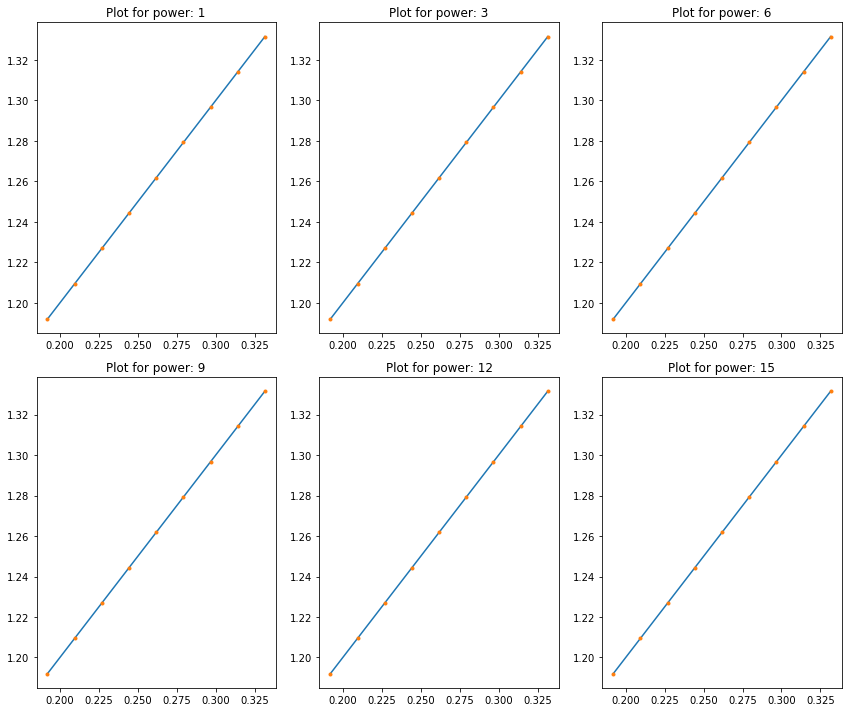

In [9]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

In [10]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,3e-31,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,2.5e-31,1,1,2.5e-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,5.9e-31,1,1,-2.2e-13,3.2e-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,5.9e-31,1,1,-3.8e-12,9.5e-12,-8.8e-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,4.4e-31,1,1,-3.9e-11,1.5e-10,-2.7e-10,2e-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,1.2e-30,1,1,9.8e-11,-5.7e-10,1.8e-09,-3e-09,2e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,4.4e-31,1,1,1e-08,-6.7e-08,2.6e-07,-6e-07,7.6e-07,-4.2e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,4.4e-31,1,1,1.5e-07,-1.1e-06,5.4e-06,-1.6e-05,3.1e-05,-3.4e-05,1.6e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,3.5e-31,1,1,0.00076,-0.0069,0.04,-0.16,0.4,-0.66,0.64,-0.27,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,3e-31,1,1,0.0031,-0.024,0.11,-0.26,-0.009,1.9,-5.3,6.8,-3.5,NaN,NaN,NaN,NaN,NaN


In [11]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    #print(predictors)
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.303028448130015e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)


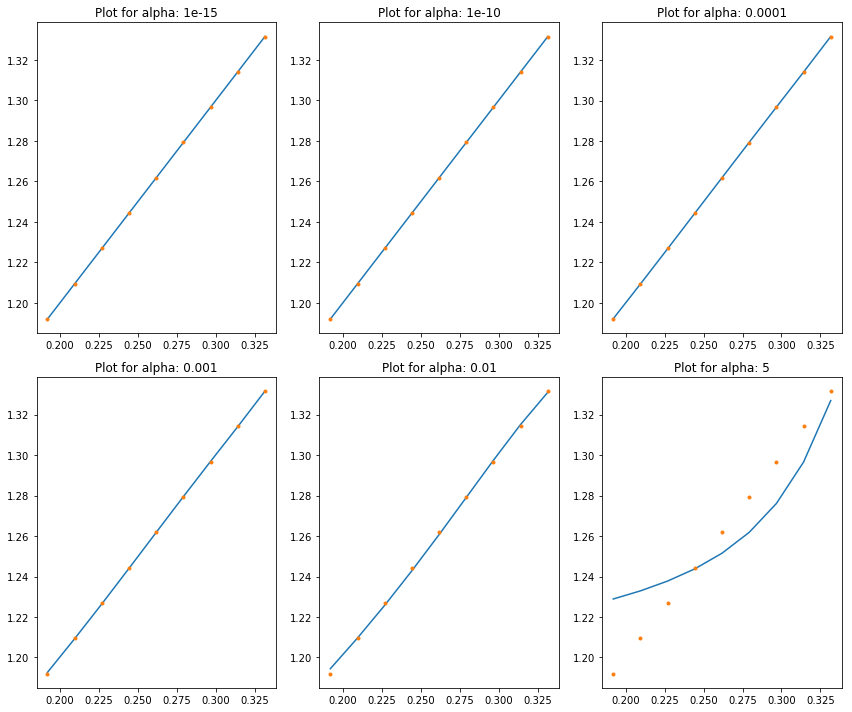

In [12]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

In [13]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,1.2e-20,1,0.99,0.051,-0.21,0.23,0.84,-0.6,-6,-6.4,31,1.2e+02,-11,-1e+03,-1.5e+03,1.1e+04,-1.1e+04
alpha_1e-10,8.9e-15,1,0.96,0.26,-0.41,-0.79,0.39,5.1,12,4.8,-71,-2.9e+02,-5.2e+02,5.6e+02,7e+03,1.8e+04,-5.8e+04
alpha_1e-08,3.3e-12,1,0.91,0.4,-0.27,-1.2,-1.5,1.6,14,39,56,-50,-6e+02,-2e+03,-3.5e+03,2.5e+03,4.2e+04
alpha_0.0001,8.9e-08,1,0.68,0.68,0.64,0.013,-2.4,-8.9,-22,-41,-34,1.3e+02,8.4e+02,2.9e+03,6.8e+03,5.4e+03,-5.6e+04
alpha_0.001,8.2e-07,1.1,0.56,0.68,0.95,1.1,0.13,-4.8,-22,-70,-1.9e+02,-4.3e+02,-7.4e+02,-4e+02,4.4e+03,3e+04,1.3e+05
alpha_0.01,1.3e-05,1.1,0.44,0.61,1,1.7,2.3,1.5,-6,-37,-1.3e+02,-4e+02,-1e+03,-2.2e+03,-3e+03,3.7e+03,5.2e+04
alpha_1,0.0011,1.2,0.15,0.25,0.56,1.3,3.2,8,20,48,1.2e+02,2.7e+02,5.9e+02,1.2e+03,2e+03,1.9e+03,-5.6e+03
alpha_5,0.0032,1.2,0.071,0.13,0.3,0.77,2.1,5.6,16,43,1.2e+02,3.4e+02,9.6e+02,2.7e+03,7.7e+03,2.2e+04,6.2e+04
alpha_10,0.005,1.2,0.049,0.09,0.22,0.57,1.6,4.3,12,35,1e+02,2.9e+02,8.4e+02,2.4e+03,7e+03,2e+04,6e+04
alpha_20,0.0078,1.2,0.032,0.06,0.15,0.39,1.1,3,8.7,25,73,2.1e+02,6.2e+02,1.8e+03,5.4e+03,1.6e+04,4.6e+04
